# Note

### Neural Network Model
- Model Class is located [keras_model.py](https://github.com/DSEI21000-S21/project-product-price-prediction/blob/main/final/model_evaluation/keras_model.py)
- Train locally because of the large data sample need to train over night
    - Training detail can look at [train_nn.py](https://github.com/DSEI21000-S21/project-product-price-prediction/blob/main/final/train_nn.py)
    
### Sample Dataset
- The computer don't have enough memory to handle the trainning for entire dataset
    - Entire Dataset: 1481082 samples
- Random sample 20% data from the entire dataset and do 70%/30% Train-Test Split

In [28]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import lightgbm as lgbm
from sklearn.ensemble import RandomForestRegressor


from final.model_evaluation.keras_model import neural_network
from final.helper.load_data import read_model_struture,read_np_file
from final.model_evaluation.visualizations import plot_loss
from final.model_evaluation.regression_cvs import find_train_best_model
from final.model_evaluation.regression_evaluation import reg_evaluation, get_ori_price
from final.helper.save_data import save_np_file

# Load preprocess data

In [2]:
x_skb_select_train = np.load("nn_data/select_k_best_train.npy")
x_skb_select_test = np.load("nn_data/select_k_best_test.npy")
y_train = np.load("nn_data/y_train.npy")
y_test = np.load("nn_data/y_test.npy")

In [3]:
x_skb_select_train.shape

(207351, 2000)

In [4]:
x_skb_select_test.shape

(88865, 2000)

# Load NN Model and Evaluation 
- Large NN

## NN Model train with selected 2000 best value 

In [6]:
select_model_name = "select_k_best_NN_256_dr1e-01_64_dr1e-01_16_dr1e-01_lr1e-03"

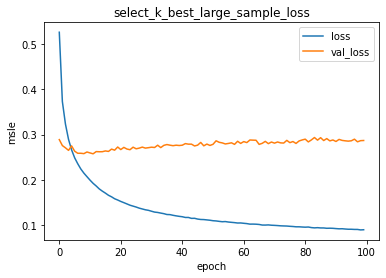

In [14]:
skb_select_loss = read_np_file(dir=select_model_name, filename=select_model_name+"_loss.npy")[:,:,0]
plot_loss(skb_select_loss[:,0],skb_select_loss[:,1], title="select_k_best_large_sample_loss")

In [15]:
print("minimum test msle: ",skb_select_loss[:,1].min())
print("minimum test msle at epoch: ",skb_select_loss[:,1].argmin())

minimum test msle:  0.2575106723697387
minimum test msle at epoch:  11


In [7]:
# load model
select_k_best_model = neural_network(model_name = select_model_name+"_ep10.h5")

In [26]:
select_k_best_model.model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               512256    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [8]:
skb_select_train_pred = select_k_best_model.predict(x_skb_select_train)
skb_select_test_pred = select_k_best_model.predict(x_skb_select_test)

Result of using select_k_best_NN_256_dr1e-01_64_dr1e-01_16_dr1e-01_lr1e-03
--------------------------------------------------
For All Price
Train Result ----------
Max Percentage Difference:  10.323575337727865
With Original Price 3.00, Predict Price 33.97: 
Min Percentage Difference:  2.580530503007929e-06
With Original Price 34.00, Predict Price 34.00: 
RMSLE is  0.42931344059973753
R^2  is  0.6677229900928046
Mean Absolute Percentage Error is  33.72599809337352

Test Result ----------
Max Percentage Difference:  24.64702860514323
With Original Price 3.00, Predict Price 76.94: 
Min Percentage Difference:  2.3475060091781286e-06
With Original Price 65.00, Predict Price 65.00: 
RMSLE is  0.51139705038099
R^2 is  0.5313632563367676
Mean Absolute Percentage Error is  41.41369673893106
--------------------------------------------------
For price under $30
Train Result ----------
Max Percentage Difference:  10.323575337727865
With Original Price 3.00, Predict Price 33.97: 
Min Percentage D

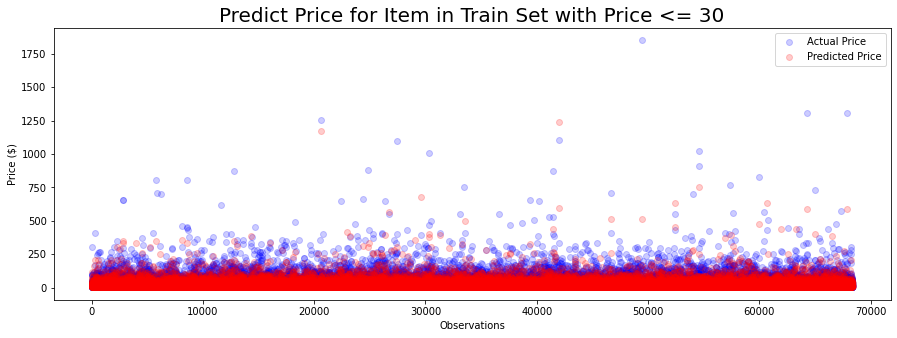

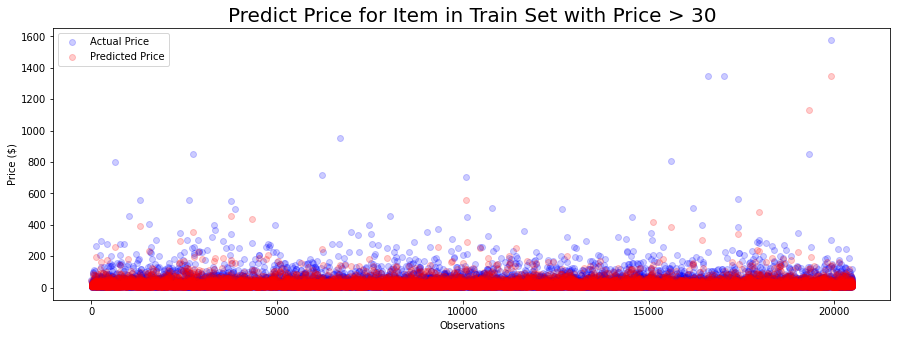

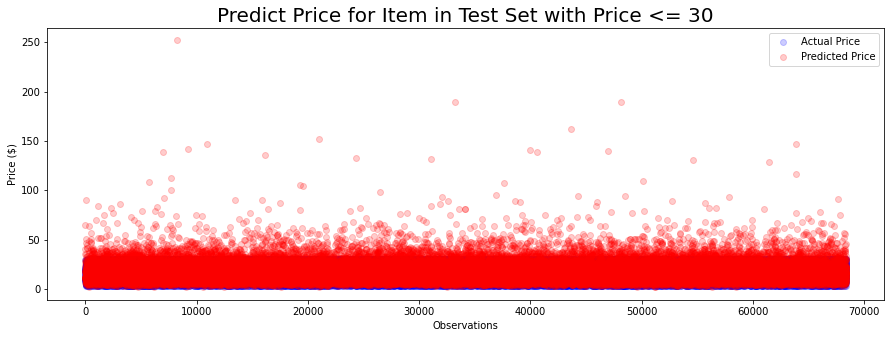

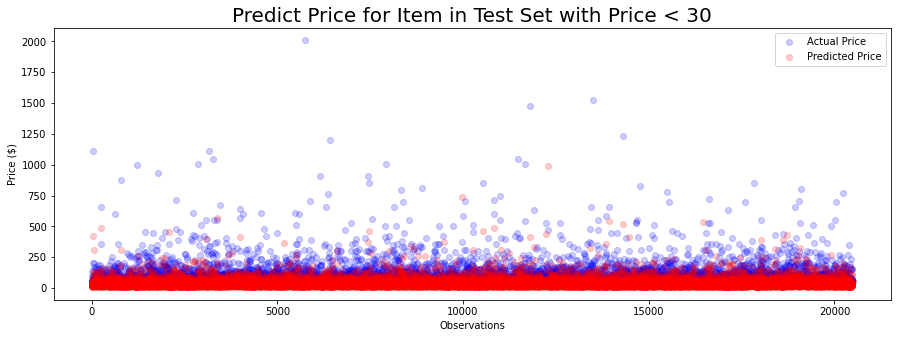

In [9]:
select_k_best_model.evaluation(y_train, skb_select_train_pred, 
                               y_test, skb_select_test_pred, price_split=30)

## NN Model train with all value 

In [10]:
all_model_name = "all_data_NN_256_dr1e-01_64_dr1e-01_16_dr1e-01_lr1e-03"

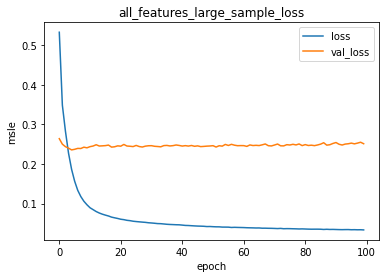

In [11]:
all_loss = read_np_file(dir=all_model_name, filename=all_model_name+"_loss.npy")[:,:,0]
plot_loss(all_loss[:,0],all_loss[:,1], title="all_features_large_sample_loss")

In [12]:
print("minimum test msle: ",all_loss[:,1].min())
print("minimum test msle at epoch: ",all_loss[:,1].argmin())

minimum test msle:  0.23555320539794025
minimum test msle at epoch:  4


In [15]:
# load model
all_model = neural_network(model_name = all_model_name+"_ep10.h5")
all_model.model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               3033344   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [17]:
all_train_pred = read_np_file(dir=all_model_name, filename="all_y_train.npy")
all_test_pred = read_np_file(dir=all_model_name, filename="all_y_test.npy")

Result of using all_data_NN_256_dr1e-01_64_dr1e-01_16_dr1e-01_lr1e-03
--------------------------------------------------
For All Price
Train Result ----------
Max Percentage Difference:  13.502265930175783
With Original Price 4.00, Predict Price 58.01: 
Min Percentage Difference:  7.335956307376645e-08
With Original Price 13.00, Predict Price 13.00: 
RMSLE is  0.12505601667142252
R^2  is  0.9718057526354925
Mean Absolute Percentage Error is  8.828345738024824

Test Result ----------
Max Percentage Difference:  38.262457275390624
With Original Price 5.00, Predict Price 196.31: 
Min Percentage Difference:  1.4093187120028325e-05
With Original Price 18.00, Predict Price 18.00: 
RMSLE is  0.5011462902732667
R^2 is  0.5499622561853981
Mean Absolute Percentage Error is  45.68264749435033
--------------------------------------------------
For price under $30
Train Result ----------
Max Percentage Difference:  13.502265930175783
With Original Price 4.00, Predict Price 58.01: 
Min Percentage Di

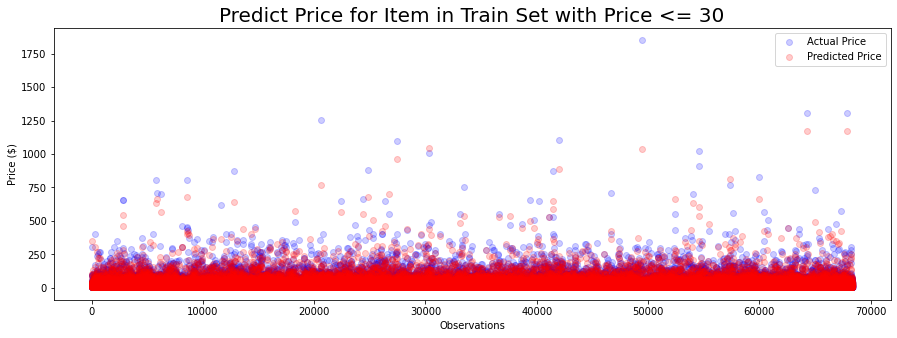

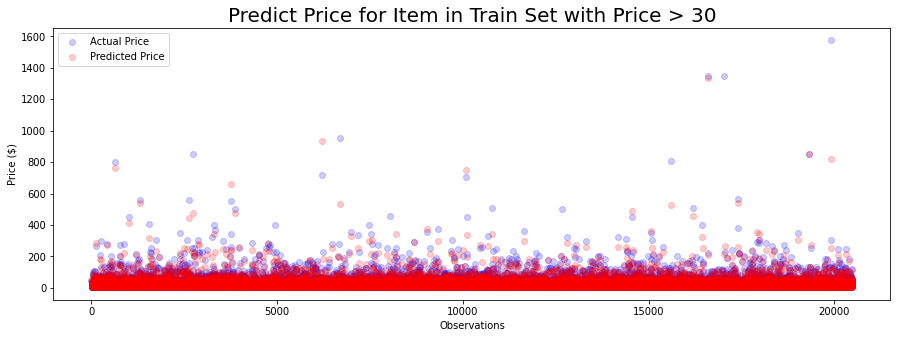

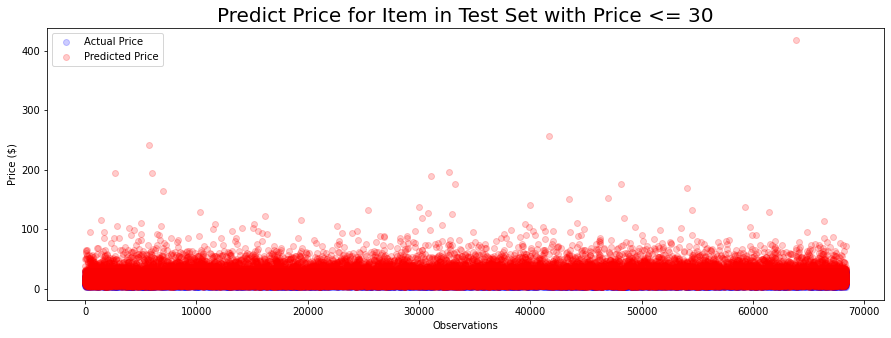

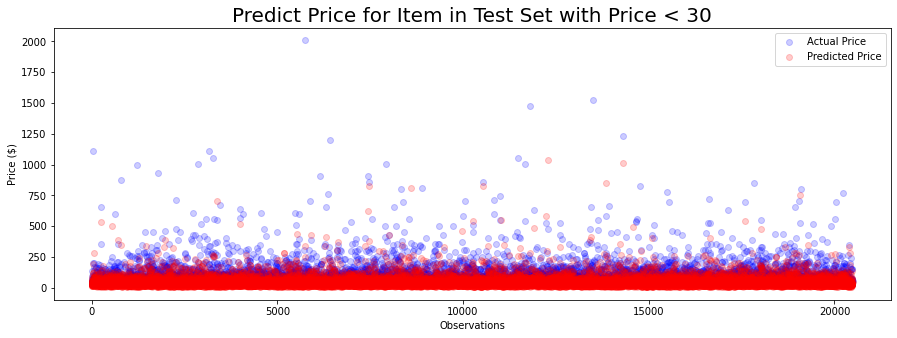

In [19]:
all_model.evaluation(y_train, all_train_pred, y_test, all_test_pred, price_split=30)

# Traditional Model

## Light GBM Regressor

In [21]:
classifier = lgbm.LGBMRegressor()
parameters = {'max_depth': [2,4,6,8,10],
              'learning_rate': [0.0001,0.001, 0.01, 0.1, 0.2],
              'n_estimators': [100, 200, 500, 1000,1500]
             }

Best Estimator LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=10,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1500, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
Best Parameters:  {'n_estimators': 1500, 'max_depth': 10, 'learning_rate': 0.1}
Best Score:  -0.2554908598556925
Result of using Feature from select k best model
--------------------------------------------------
For All Price
Train Result ----------
Max Percentage Difference:  9.401443555504212
With Original Price 7.00, Predict Price 72.81: 
Min Percentage Difference:  1.137676475608595e-06
With Original Price 21.00, Predict Price 21.00: 
RMSLE is  0.43680478630061426
R^2  is  0.6560256170536198
Mean Absolute Percentage Erro

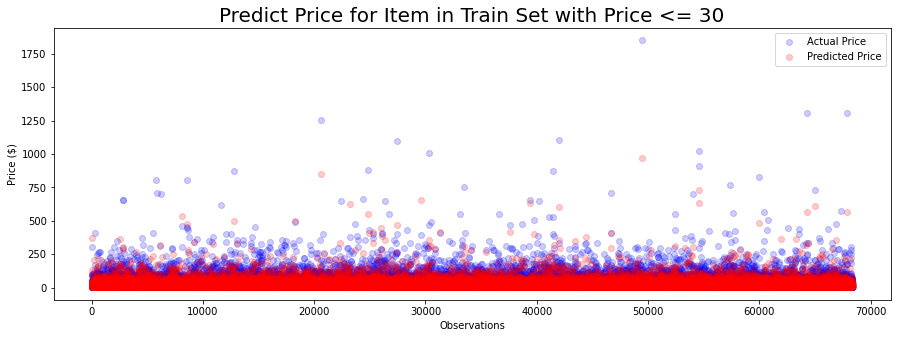

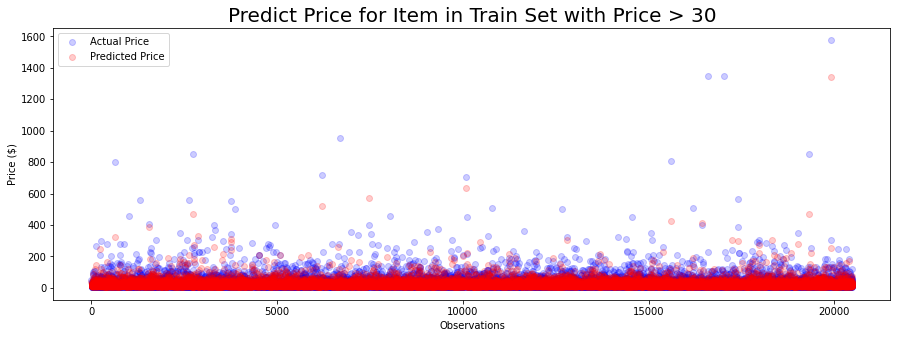

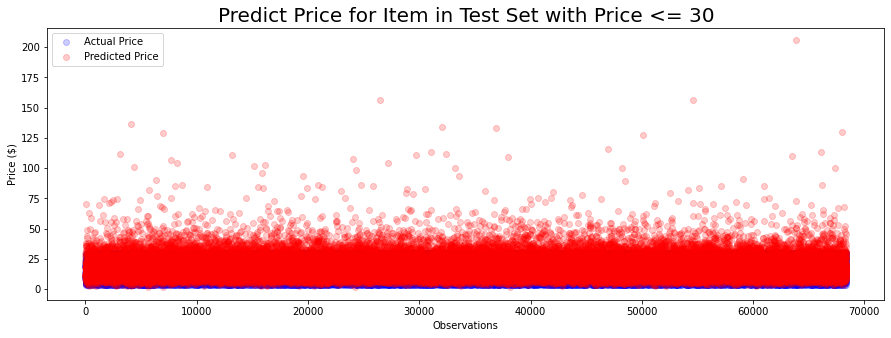

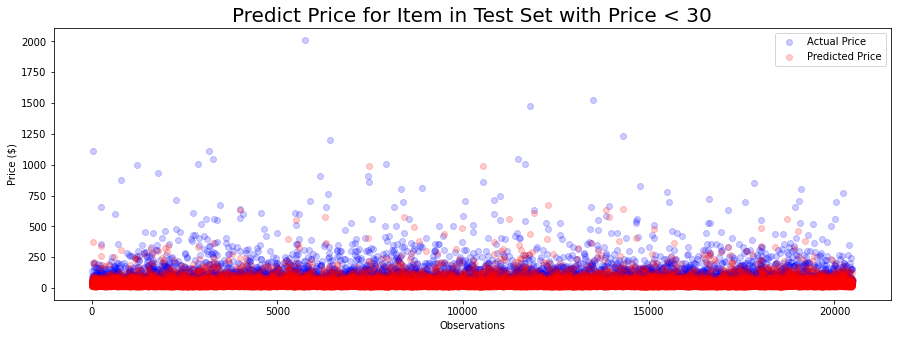

In [24]:
find_train_best_model(classifier, parameters, x_skb_select_train, y_train, 
                      x_skb_select_test, y_test, 
                      data_name="Feature from select k best model", price_split=30)

### Random Forest Regressor - Hyperparameter From Sample Data

In [ ]:
rf_model = RandomForestRegressor(n_estimators=500, max_features=50)
rf_model.fit(x_skb_select_train, y_train)

In [ ]:
train_pred = rf_model.predict(x_skb_select_train)
test_pred = rf_model.predict(x_skb_select_test)

In [ ]:
save_np_file(dir = "data", filename="select_k_best_rf_train_pred.npy", data=train_pred)
save_np_file(dir = "data", filename="select_k_best_rf_test_pred.npy", data=test_pred)

In [ ]:
ori_train_price, ori_test_price, pred_train_price, pred_test_price = get_ori_price(y_train, train_pred, y_test,
                                                                                   test_pred)

reg_evaluation(ori_train_price, ori_test_price, pred_train_price, pred_test_price,  # origin price
               y_train, train_pred, y_test, test_pred,
               price_split)